In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jane-street-real-time-market-data-forecasting/responders.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/sample_submission.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/features.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=4/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=5/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=6/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=3/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=1/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=8/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=2/part-0.parquet
/kaggle/input/jane-street-real-time-market

In [3]:
##Reading the features and responder csv files to understand the dataset
# Load the dataset
features_data = pd.read_csv('/kaggle/input/jane-street-real-time-market-data-forecasting/features.csv')
responders_data =  pd.read_csv('/kaggle/input/jane-street-real-time-market-data-forecasting/responders.csv')
# Display the first few rows of the dataset


In [4]:
#Get the length of the features_data and responders_data ###
len(features_data)
len(responders_data)

9

In [ ]:
features_data.head(10)

In [ ]:
responders_data.head(10)

In [ ]:
## The Problem solving for the dataset starts from here starting with installing the right packages ###
######################################################################################################

In [1]:
!pip install polars

ERROR: Could not find a version that satisfies the requirement polars (from versions: none)
ERROR: No matching distribution found for polars


In [ ]:

import pandas as pd
import polars as pl
train = \
pl.scan_parquet(
    f"/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet"
).\
select(
    pl.int_range(pl.len(), dtype=pl.UInt64).alias("id"),
    pl.all(),
).collect()

# Read the parquet file and convert to pandas dataframe
# Slice to only get the first 40,000 rows
train_df = train.to_pandas().iloc[:950000]
#In a similar manner i can read the test files
test = \
pl.scan_parquet(
    f"/kaggle/input/jane-street-real-time-market-data-forecasting/test.parquet"
).\
select(
    pl.int_range(pl.len(), dtype=pl.UInt64).alias("id"),
    pl.all(),
).collect()
test_df = test.to_pandas().iloc[:950000]



In [50]:
##reading the training daatset by partitions :
import pandas as pd
train_df = pd.read_parquet('/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=5/part-0.parquet')
train_df.head(10)

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,850,0,0,2.087724,-0.276877,-2.385324,-1.086325,0.049463,3.427029,-4.671824,...,-0.295312,-0.346724,0.054874,-0.050004,0.803933,0.725200,0.141694,1.461546,0.779843,0.404129
1,850,0,1,3.752097,-0.168178,-2.161023,-0.511679,0.192425,3.162096,-4.386098,...,-0.444008,-0.086088,0.056619,-0.396622,0.396958,1.208221,-1.016843,0.789595,1.251492,-1.701416
2,850,0,2,1.225099,-0.520426,-1.718115,-0.817358,-0.270528,3.314825,-2.578923,...,-0.267447,0.636380,0.280909,1.168953,-2.395850,-1.057062,-3.009765,-2.848316,-0.974728,-5.000000
3,850,0,3,1.467042,-0.061985,-1.818735,-0.990254,0.274284,3.810929,-1.111770,...,-0.157564,2.754708,0.792327,0.403978,-0.096906,-0.263321,0.094231,-0.749164,-0.691085,-0.089415
4,850,0,5,3.144071,-0.321442,-1.964041,-0.409452,-0.343893,3.069664,-2.929145,...,-0.138634,0.151213,0.207094,0.139006,-0.440090,0.145323,-0.967585,-0.882600,0.131690,-1.548052
5,850,0,7,2.197618,-0.920352,-2.753816,-0.823805,-0.022112,3.007740,-3.375129,...,-0.177937,-0.964391,-0.683774,-1.064332,-0.717571,-0.712514,-1.853505,-0.055907,-0.444895,-2.813932
6,850,0,8,2.094038,0.133232,-2.195577,-1.386584,0.360822,3.671874,-2.466010,...,-0.452496,-0.059468,0.072518,-0.253422,0.191875,0.162306,-0.048974,0.336493,0.140711,0.091906
7,850,0,9,1.474736,0.086528,-2.147897,-1.487129,-0.299004,3.660887,-5.913468,...,-0.205526,0.132412,0.152140,-0.058068,-0.037485,0.159067,-1.626778,-0.311158,-0.018691,-3.114785
8,850,0,10,0.892125,-0.258390,-2.537289,-0.438095,-0.205909,3.344720,-2.983913,...,3.720120,-0.233305,-0.142806,-0.601231,-0.220472,0.361943,-0.950540,0.025254,0.430311,-1.193361
9,850,0,11,1.271155,-0.885654,-2.396034,-1.070651,-0.198664,3.690419,-3.567837,...,-0.345609,-0.274564,-0.155235,-0.761869,-0.438279,0.604514,-1.022208,-0.379646,0.948544,-0.715813


In [51]:
#lets read the test dataframe which can be used to make predictions and it will help to understand how can i move forward
#In a similar manner i can read the test files
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd

# Define a schema that matches your dataset
schema = pa.schema([
    ('date_id', pa.int32()),  # Set date_id explicitly as int32
    # Add other fields here, matching their expected types from the dataset
])

# Read the parquet file using the defined schema
try:
    test_table = pq.read_table('/kaggle/input/jane-street-real-time-market-data-forecasting/test.parquet', schema=schema)
    test_df = test_table.to_pandas()  # Convert to pandas DataFrame
except pa.ArrowInvalid as e:
    print(f"Schema mismatch error: {e}")


In [52]:
# Try using fastparquet engine
#!pip install fastparquet
test_df = pd.read_parquet('/kaggle/input/jane-street-real-time-market-data-forecasting/test.parquet', engine='fastparquet')

In [53]:
test_df.columns

Index(['row_id', 'time_id', 'symbol_id', 'weight', 'is_scored', 'feature_00',
       'feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_05',
       'feature_06', 'feature_07', 'feature_08', 'feature_09', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60'

In [54]:
print(len(train_df))


5348200


In [55]:
len(test_df)

39

In [19]:
#Lets understand the train_df 
train_df.describe()

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
count,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,...,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06,4.016784e+06
mean,5.943619e+02,4.252475e+02,1.715842e+01,1.534328e+00,6.788324e-01,3.791868e-02,6.801845e-01,6.792592e-01,5.668041e-03,1.968469e-02,...,2.409329e-02,-5.230495e-03,-7.936713e-03,-1.698925e-03,-8.170333e-04,3.591325e-03,-7.668324e-04,2.035924e-03,8.277444e-03,1.825075e-03
std,4.931525e+01,2.460023e+02,1.063347e+01,9.906041e-01,7.839538e-01,9.995292e-01,7.808906e-01,7.812273e-01,1.000171e+00,9.528027e-01,...,1.094076e+00,6.636180e-01,6.165773e-01,6.821313e-01,8.157167e-01,9.091847e-01,6.874717e-01,1.008232e+00,1.024428e+00,9.594865e-01
min,5.100000e+02,0.000000e+00,0.000000e+00,1.499667e-01,-2.530010e+00,-4.489919e+00,-2.309821e+00,-2.319991e+00,-4.070419e+00,-1.035315e+01,...,-4.108544e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00
25%,5.520000e+02,2.120000e+02,9.000000e+00,8.166375e-01,1.434030e-01,-6.234758e-01,1.475988e-01,1.461820e-01,-6.707489e-01,-4.430500e-01,...,-3.247779e-01,-2.217195e-01,-2.006176e-01,-2.093859e-01,-3.513431e-01,-4.177625e-01,-2.397047e-01,-4.402240e-01,-4.627351e-01,-3.639627e-01
50%,5.930000e+02,4.250000e+02,1.600000e+01,1.299271e+00,6.696041e-01,4.480504e-02,6.701370e-01,6.694350e-01,6.857579e-03,-2.570146e-04,...,-2.208717e-01,-5.431225e-03,-2.571316e-02,-1.222442e-03,-1.327658e-02,-1.849656e-02,-4.872181e-03,-1.221631e-02,-1.726285e-02,-1.787071e-03
75%,6.370000e+02,6.380000e+02,2.500000e+01,1.982242e+00,1.173076e+00,7.007398e-01,1.172781e+00,1.171978e+00,6.852241e-01,4.678152e-01,...,5.048276e-02,2.096188e-01,1.634375e-01,2.059792e-01,3.268162e-01,3.967112e-01,2.289487e-01,4.176248e-01,4.422771e-01,3.579024e-01
max,6.790000e+02,9.670000e+02,3.800000e+01,6.260499e+00,6.069376e+00,5.772680e+00,6.075621e+00,5.977812e+00,4.092433e+00,1.351800e+01,...,1.030122e+02,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [8]:
##lets check the null values in the train df
train_df.isnull().sum()

date_id              0
time_id              0
symbol_id            0
weight               0
feature_00     1944210
                ...   
responder_4          0
responder_5          0
responder_6          0
responder_7          0
responder_8          0
Length: 92, dtype: int64

In [9]:
#lets train a simple model on to understand how its working
print(train_df.columns)

Index(['date_id', 'time_id', 'symbol_id', 'weight', 'feature_00', 'feature_01',
       'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06',
       'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46',
       'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51',
       'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56',
       'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_6

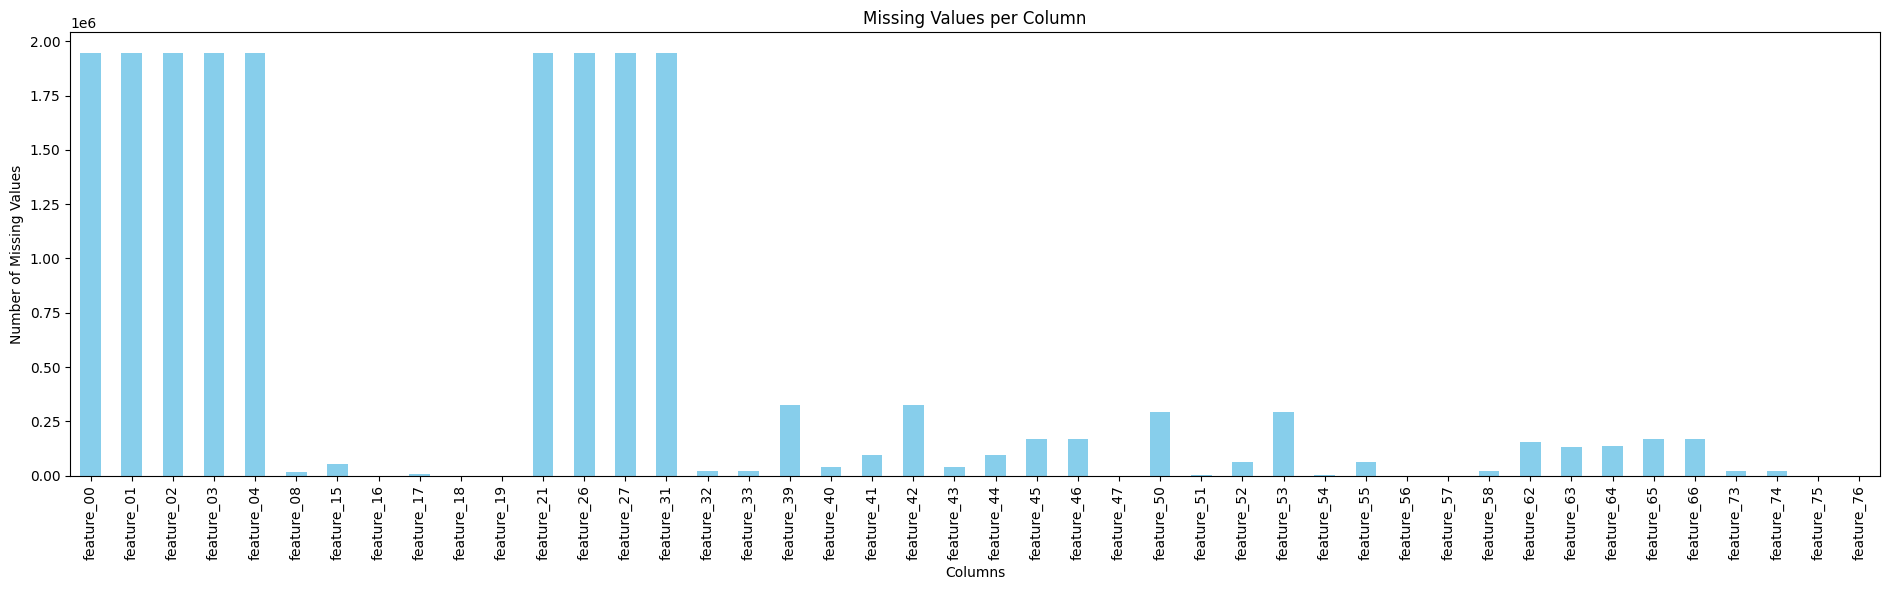

In [12]:
import matplotlib.pyplot as plt
missing_values = train_df.isnull().sum()

# Filter columns that have missing values
missing_values = missing_values[missing_values > 0]

# Create a bar plot of missing values
plt.figure(figsize=(19, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
print(train_df.columns)

Index(['date_id', 'time_id', 'symbol_id', 'weight', 'feature_05', 'feature_06',
       'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_28', 'feature_29',
       'feature_30', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60',
       'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65',
       'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_7

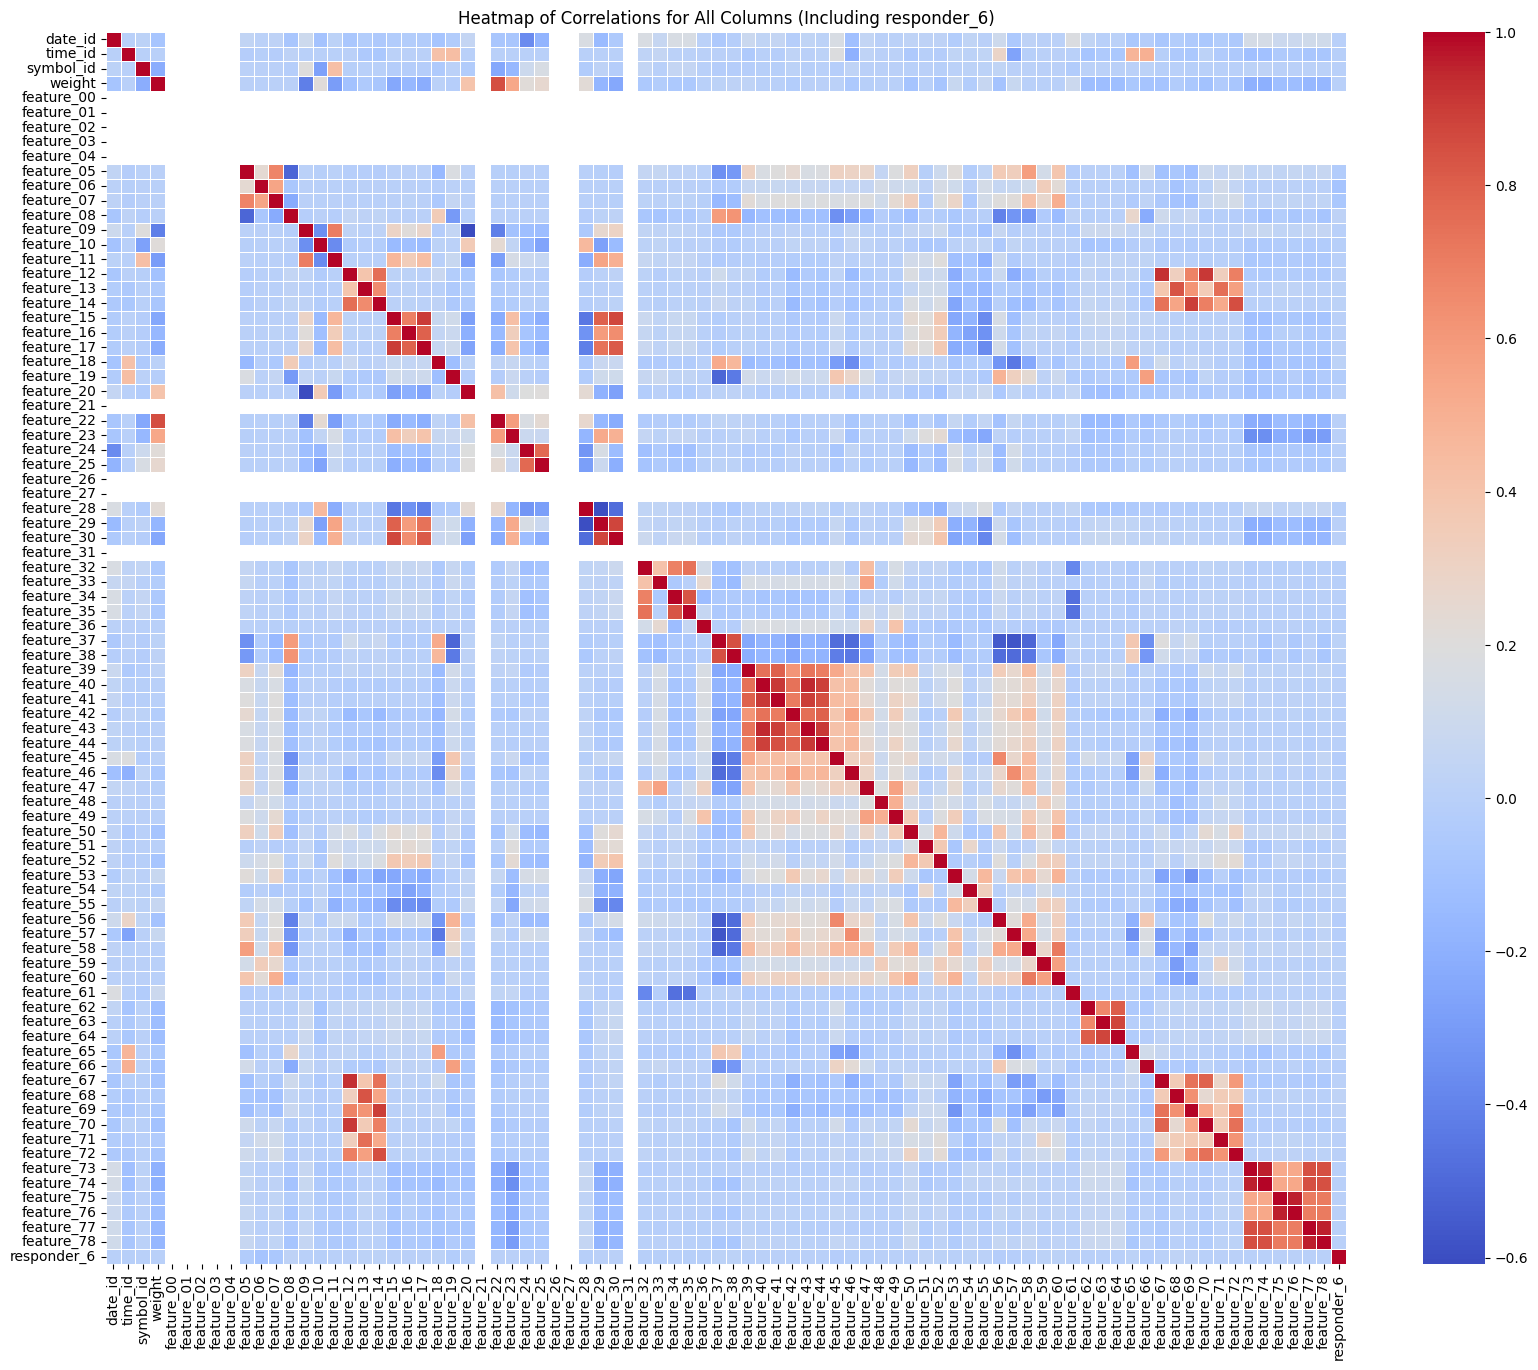

In [13]:
#let createa heatmap of correlations to understand the feature collinearity within the dataset :
import seaborn as sns
import matplotlib.pyplot as plt

# Drop all responder columns except responder_6
data = train_df.drop(columns=['responder_0', 'responder_1', 'responder_2', 'responder_3', 
                        'responder_4', 'responder_5', 'responder_7', 'responder_8'])

# Set up the figure size for a large heatmap
plt.figure(figsize=(20, 16))

# Generate the heatmap for the dataset correlations
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Heatmap of Correlations for All Columns (Including responder_6)')
plt.show()

In [12]:
## Training a LGM Model for the training dataset to find out the feature importance by using the mode.This is an initial step in
##learning to get the best fit model and make transition to deep learning model using tensorflow.  #########
!pip install lightgbm

^C


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Step 1: Drop columns with all NaN values
train_df = train_df.dropna(axis=1, how='all')

# Step 2: Split the data into features and target
X = train_df.drop(columns=[ 'date_id', 'time_id',\
                           'feature_39','feature_40', 'feature_43',\
                           'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',\
                           'feature_62', 'feature_63', 'feature_64','feature_65', 'feature_66',\
                           'responder_3','responder_8','responder_6','responder_7','responder_4','responder_5','responder_2',\
                           'feature_09','feature_06','feature_60','feature_07','feature_15', \
                           'feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_51',\
                           'feature_54','feature_56','feature_57','feature_59',\
                           'feature_61','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72',\
                           'feature_75','feature_76','feature_77','feature_78','feature_05',\
                            'responder_0','responder_1', 'feature_00','feature_01','feature_02','feature_03','feature_04',\
                          'feature_21','feature_26','feature_27',\
                           'feature_31'])  
# Features
y = train_df['responder_6']  # Target variable
print(X.columns)
# Step 3: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with the mean
X = imputer.fit_transform(X)  # Apply imputer to the features

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Initialize and train the SGDRegressor model
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
#model = LGBMRegressor(n_estimators=100, learning_rate=0.1, num_leaves=31)
model.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Index(['symbol_id', 'weight', 'feature_08', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_28', 'feature_29', 'feature_30',
       'feature_32', 'feature_41', 'feature_42', 'feature_44', 'feature_50',
       'feature_52', 'feature_53', 'feature_55', 'feature_58', 'feature_73',
       'feature_74'],
      dtype='object')
Mean Squared Error: 0.8151712969640685


In [63]:
#lets see the columsn present within the test_df 
print(test_df.columns)


Index(['row_id', 'time_id', 'symbol_id', 'weight', 'is_scored', 'feature_00',
       'feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_05',
       'feature_06', 'feature_07', 'feature_08', 'feature_09', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60'

In [58]:
#lets prediction the submision.csv file using the above lgbm model and then we can improve further ###
import pandas as pd

import pandas as pd

# Step 1: Drop unnecessary columns in the test dataset
# Columns to drop in test_df based on the columns that were dropped from train_df
columns_to_drop_in_test = ['is_scored','feature_34','feature_05','feature_35', 'feature_36', 'feature_37', 'feature_38',
                           'feature_51', 'feature_54', 'feature_56', 'feature_57', 'feature_59',
                           'feature_61', 'feature_67', 'feature_68', 'feature_69', 'feature_70', 
                           'feature_71', 'feature_72', 'feature_75', 'feature_76', 'feature_77',
                           'feature_78','feature_00', 'feature_01', 'feature_02', 'feature_03','feature_04',\
                          'feature_06', 'feature_07', 'feature_09', 'feature_21','feature_21','feature_26','feature_27',\
                          'feature_31','feature_40','feature_43','feature_45','feature_46','feature_47',\
                          'feature_48','feature_49','feature_60','feature_62','feature_63','feature_64','feature_65',\
                          'feature_66', 'row_id', 'date_id', 'time_id','feature_15','feature_33','feature_39',\
                          'feature_00','feature_01','feature_02','feature_03','feature_04','feature_21','feature_26','feature_27',\
                           'feature_31']

# Drop the columns from test_df that were not used in training
X_test_df = test_df.drop(columns=columns_to_drop_in_test)

# Step 2: Handle missing values in test_df using the same SimpleImputer from train_df
X_test_df = imputer.transform(X_test_df)  # Use the same imputer fitted on the training data

# Step 3: Standardize test_df using the same StandardScaler from train_df
X_test_df_scaled = scaler.transform(X_test_df)  # Use the same scaler fitted on the training data

# Step 4: Make predictions on the test_df using the trained model
y_test_pred = model.predict(X_test_df_scaled)

# Step 5: Create a DataFrame with 'id' column and the predictions
submission_df = pd.DataFrame({
    'row_id': test_df['row_id'],  # Use 'id' column from test_df as identifier
    'prediction': y_test_pred
})

# Step 6: Save the DataFrame as a CSV file for submission to Kaggle
submission_df.to_csv('submission.csv', index=False)
print(submission_df)
print("Submission file 'submission.csv' created successfully!")



    row_id  prediction
0        0   -0.036636
1        1   -0.042208
2        2   -0.036420
3        3   -0.038191
4        4   -0.043115
5        5   -0.037907
6        6   -0.046784
7        7   -0.027368
8        8   -0.036681
9        9   -0.044283
10      10   -0.036722
11      11   -0.039801
12      12   -0.031401
13      13   -0.034340
14      14   -0.042259
15      15   -0.041223
16      16   -0.024235
17      17   -0.028395
18      18   -0.035953
19      19   -0.014622
20      20   -0.041360
21      21   -0.038621
22      22   -0.038771
23      23   -0.034949
24      24   -0.035102
25      25   -0.033774
26      26   -0.037855
27      27   -0.024502
28      28   -0.034046
29      29   -0.035806
30      30   -0.032855
31      31   -0.034799
32      32   -0.034435
33      33   -0.034773
34      34   -0.021962
35      35   -0.034573
36      36   -0.035050
37      37   -0.031725
38      38   -0.015153
Submission file 'submission.csv' created successfully!


       Feature  Coefficient  Abs_Coefficient
9   feature_17     0.059993         0.059993
28  feature_58     0.031168         0.031168
24  feature_50    -0.030257         0.030257
19  feature_30    -0.027351         0.027351
15  feature_24     0.027014         0.027014
22  feature_42    -0.022160         0.022160
5   feature_12    -0.021693         0.021693
23  feature_44     0.017860         0.017860
27  feature_55     0.016561         0.016561
4   feature_11     0.014853         0.014853
6   feature_13    -0.013977         0.013977
18  feature_29    -0.013017         0.013017
2   feature_08     0.012008         0.012008
10  feature_18    -0.010088         0.010088
21  feature_41     0.009552         0.009552
8   feature_16     0.008629         0.008629
12  feature_20     0.008303         0.008303
14  feature_23    -0.007892         0.007892
20  feature_32     0.007837         0.007837
26  feature_53     0.006677         0.006677
16  feature_25     0.006618         0.006618
1       we

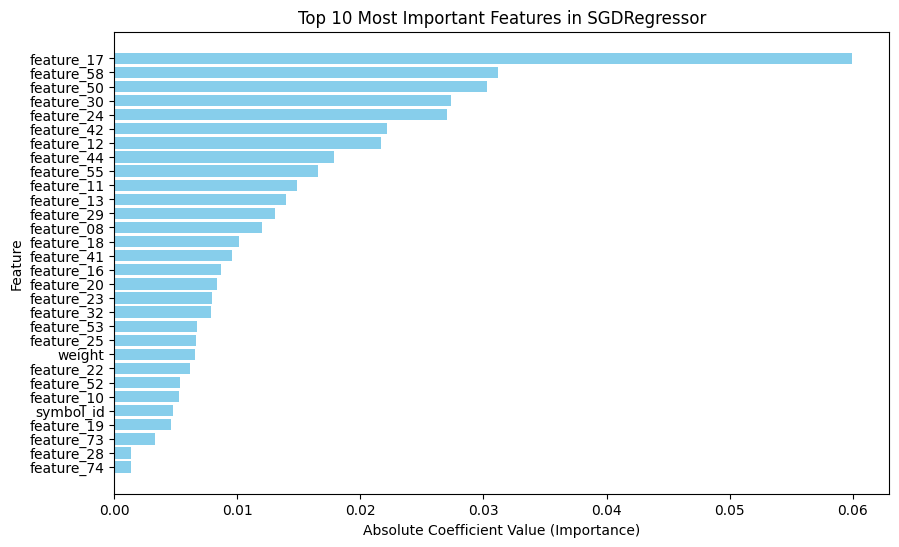

In [61]:
# Step 9: Get feature importance (coefficients)
import matplotlib.pyplot as plt
coefficients = model.coef_

# Step 10: Create a DataFrame to display feature importance
features_df = pd.DataFrame({
    'Feature': train_df.drop(columns=[ 'date_id', 'time_id',\
                           'feature_39','feature_40', 'feature_43',\
                           'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',\
                           'feature_62', 'feature_63', 'feature_64','feature_65', 'feature_66','responder_6',\
                           'responder_3','responder_8','responder_7','responder_4','responder_5','responder_2',\
                           'feature_09','feature_06','feature_60','feature_07','feature_15', \
                           'feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_51',\
                           'feature_54','feature_56','feature_57','feature_59',\
                           'feature_61','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72',\
                           'feature_75','feature_76','feature_77','feature_78','feature_05',\
                            'responder_0','responder_1','feature_00','feature_01','feature_02','feature_03','feature_04',\
                                     'feature_21','feature_26','feature_27',\
                           'feature_31']).columns,
    'Coefficient': coefficients
})

# Step 11: Sort by absolute coefficient value to get the most important features
features_df['Abs_Coefficient'] = features_df['Coefficient'].abs()
top_features = features_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the sorted feature importance
print(top_features)

# Step 12: Optionally, visualize the top 10 features
top_10_features = top_features.head(30)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features in SGDRegressor')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

In [41]:
# Step 6: Get and print the coefficients (these represent the model weights)
coefficients = model.coef_

# Display the coefficients
print("Model Coefficients (Weights):")
for feature, coef in zip(train_df.drop(columns=['date_id', 'time_id']).columns, coefficients):
    print(f"{feature}: {coef}")

Model Coefficients (Weights):
symbol_id: 0.008050565607845783
weight: 0.00671757198870182
feature_00: 0.003028356470167637
feature_01: -0.005297024268656969
feature_02: -0.0031673102639615536
feature_03: 0.0007976801134645939
feature_04: -0.008652765303850174
feature_05: -0.006309567950665951
feature_06: -0.010254091583192348
feature_07: -0.010879655368626118
feature_08: 0.0133144436404109
feature_09: -0.009687455371022224
feature_10: 0.009555941447615623
feature_11: 0.005544518120586872
feature_12: 0.015617795288562775
feature_13: 0.0016238902462646365
feature_14: -0.010903807356953621
feature_15: 0.0015749240992590785
feature_16: 0.016715243458747864
feature_17: 0.01211706642061472
feature_18: -0.0006060970481485128
feature_19: 0.004189243074506521
feature_20: -0.012316805310547352
feature_22: -0.004896453116089106
feature_23: -0.00278281606733799
feature_24: 0.011792673729360104
feature_25: 0.004748131148517132
feature_28: 0.02185073122382164
feature_29: 0.010436075739562511
feature

In [ ]:
##Training a tensorflow model to run it on GPU as well instead of just running on TPU as the above model is memory intensive 
##we need to more efficient model and this will definitely work .Tensorflow is generatiev AI framework. ######

In [15]:
import tensorflow as tf

# Verify TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# Create a simple constant tensor and print it
hello = tf.constant("Hello, TensorFlow!")
print(hello)

# Start a simple session
tf.print(hello)



TensorFlow version: 2.16.1
tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)
Hello, TensorFlow!


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input

# Step 1: Drop columns with all NaN values
train_df = train_df.dropna(axis=1, how='all')

# Step 2: Split the data into features and target
X = train_df.drop(columns=['date_id', 'time_id', 
                           'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 
                           'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 
                           'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'responder_6', 
                           'responder_3', 'responder_8', 'responder_7', 'responder_4', 'responder_5', 'responder_2', 'feature_09'])  # Features
y = train_df['responder_6']  # Target variable

# Step 3: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with the mean
X = imputer.fit_transform(X)  # Apply imputer to the features

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model using the Input layer
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(64, activation='relu'))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set (flatten the output for evaluation)
y_pred = model.predict(X_test_scaled).flatten()  # Flatten to convert 2D to 1D

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Epoch 1/100


NotFoundError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/local/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/local/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/usr/local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/usr/local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/local/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/local/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/local/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/usr/local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/usr/local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/usr/local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/usr/local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_13/282333531.py", line 42, in <module>

  File "/usr/local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

could not find registered transfer manager for platform Host -- check target linkage
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_2451]

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2403158483319604212
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12696079008099284630
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2249600973753985583
physical_device_desc: "device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5"
xla_global_id: 2144165316
]
